In [1]:
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from PySide6.QtGui import QImage, QPixmap, QColor, QTransform, QPen
from PySide6.QtGui import QPainter, QPainterPath, QPen
from PySide6.QtWidgets import QApplication
app = QApplication(sys.argv)


In [19]:
a = np.array([1,2,3,4,0,0,0,8,9,10])

In [26]:
c = []

for i in range(len(a)):
    if i in c:
        continue
    if a[i] == 0:
        if a[i-1] != 0 and a[i+1] != 0:
            print(1)
        else:
            start_idx = i
            
            c = []
            j = i + 1
            
            while True:
                c.append(j)
                if a[j] != 0:
                    print(j)
                    i = j
                    break
                j = j + 1

            end_idx = i - 1
            print(start_idx, end_idx)
            print(a[start_idx - 1], a[end_idx + 1])
            print(len(c)+1)


7
4 6
4 8
4


In [30]:
from modules.utils.shape import shape_to_mask, get_index_of_mask

In [32]:
a = get_index_of_mask(np.ones((2,3)))

In [36]:
a = np.array([True, False, True])
b = np.array([1,2,3])

In [41]:
(np.sum(a*b)/np.sum(a))

2.0

In [44]:
np.mean(np.sum(a*b)/np.sum(a))

2.0

In [45]:
np.log(b/2)

array([-0.69314718,  0.        ,  0.40546511])

In [55]:
w = 10
h = 8

pix = QPixmap(w, h)
pix.fill(QColor(0,0,0,0))
painter = QPainter(pix)
pen = QPen()
pen.setWidthF(0)
pen.setColor(QColor(0,0,0,0))
painter.setPen(pen)
painter.setBrush(QColor(0,255,255,255))
painter.drawEllipse(1,1, 5,5)
painter.end()
print(pix.width(), pix.height())
img = pix.toImage()
b = img.bits()
img_array = np.frombuffer(b, np.uint8).reshape((h, w, 4))
mask = img_array[:,:,-1].astype(bool)
# plt.imsave('1.jpg', i)

10 8


In [56]:
c = img.createMaskFromColor(QColor(0,255,255,255).value())
d = c.convertToFormat(QImage.Format_RGB888)

In [51]:
d

<PySide6.QtGui.QImage(QSize(10, 8),format=QImage::Format_RGB888,depth=24,devicePixelRatio=1,bytesPerLine=32,sizeInBytes=256) at 0x00000146AA424D00>

In [57]:
plt.imshow(np.frombuffer(d.bits(), np.uint8).reshape((h, w, 3)))

ValueError: cannot reshape array of size 256 into shape (8,10,3)

In [13]:
c.convertToFormat(QImage.Format_Grayscale8)

<PySide6.QtGui.QImage(QSize(10, 8),format=QImage::Format_Grayscale8,depth=8,devicePixelRatio=1,bytesPerLine=12,sizeInBytes=96) at 0x00000146A9C2ED00>

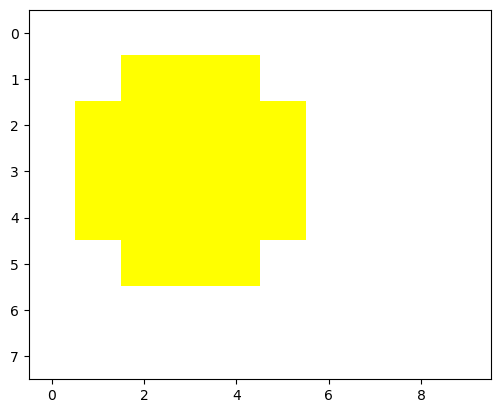

In [59]:
plt.imshow(i)

In [32]:
np.array([True, False]).dtype

dtype('bool')

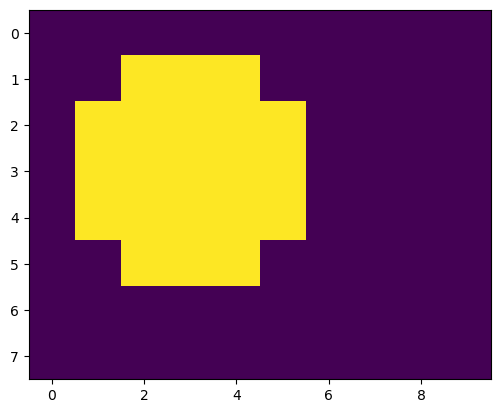

In [68]:
plt.imshow(())

In [12]:
out.shape

(200, 120)

In [ ]:
sys.exit(app.exec())

In [6]:
import numpy as np
import cv2
from PIL import Image, ImageColor

import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [74]:
colorslist = ['black','#0D8BF3','#34F065','#F6E43C','#EE1A26', ]
cmap = colors.LinearSegmentedColormap.from_list('CBFcmap',colorslist,N=256)

color_list = [[cmap(i)[0],cmap(i)[1],cmap(i)[2] ]for i in range(cmap.N)]
cmp = np.array(color_list)*255
cmp = cmp.astype(np.uint8)

In [107]:
r = cv2.applyColorMap(img, cmp[:,0])
g = cv2.applyColorMap(img, cmp[:,1])
b = cv2.applyColorMap(img, cmp[:,2])
np.stack([r,g,b], axis=-1).shape

(96, 128, 3)

In [30]:
from pydicom import dcmread
ds = dcmread(r'E:\A30\DSC\Im00008.dcm')

img = ds.pixel_array
img = np.clip(img, a_min=0, a_max=4000)
img = ((img - img.min()) / max(1, img.max() - img.min()))*255
img = img.astype(np.uint8)